In [1]:
! pip install -q kaggle

In [2]:
! mkdir ~/.kaggle

In [3]:
! cp kaggle.json ~/.kaggle/

In [4]:
! chmod 600 ~/.kaggle/kaggle.json

# Load Data

In [5]:
!kaggle competitions download -c house-prices-advanced-regression-techniques

  0% 0.00/199k [00:00<?, ?B/s]
100% 199k/199k [00:00<00:00, 116MB/s]


In [6]:
! unzip "/content/house-prices-advanced-regression-techniques.zip" -d "/content/house-prices-advanced-regression-techniques"

Archive:  /content/house-prices-advanced-regression-techniques.zip
  inflating: /content/house-prices-advanced-regression-techniques/data_description.txt  
  inflating: /content/house-prices-advanced-regression-techniques/sample_submission.csv  
  inflating: /content/house-prices-advanced-regression-techniques/test.csv  
  inflating: /content/house-prices-advanced-regression-techniques/train.csv  


# Data Analysis

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_sample = pd.read_csv('/content/house-prices-advanced-regression-techniques/sample_submission.csv')
print(df_sample)

        Id      SalePrice
0     1461  169277.052498
1     1462  187758.393989
2     1463  183583.683570
3     1464  179317.477511
4     1465  150730.079977
...    ...            ...
1454  2915  167081.220949
1455  2916  164788.778231
1456  2917  219222.423400
1457  2918  184924.279659
1458  2919  187741.866657

[1459 rows x 2 columns]


In [8]:
df = pd.read_csv('/content/house-prices-advanced-regression-techniques/train.csv')
print(df)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fe

In [9]:
df_test = pd.read_csv('/content/house-prices-advanced-regression-techniques/test.csv')
print(df_test)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     1461          20       RH         80.0    11622   Pave   NaN      Reg   
1     1462          20       RL         81.0    14267   Pave   NaN      IR1   
2     1463          60       RL         74.0    13830   Pave   NaN      IR1   
3     1464          60       RL         78.0     9978   Pave   NaN      IR1   
4     1465         120       RL         43.0     5005   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1454  2915         160       RM         21.0     1936   Pave   NaN      Reg   
1455  2916         160       RM         21.0     1894   Pave   NaN      Reg   
1456  2917          20       RL        160.0    20000   Pave   NaN      Reg   
1457  2918          85       RL         62.0    10441   Pave   NaN      Reg   
1458  2919          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour Utilities  ... ScreenPorch PoolAre

In [10]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [11]:
df.drop(columns=['Id'],inplace= True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [14]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [15]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   LotFrontage    1201 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   OverallQual    1460 non-null   int64  
 4   OverallCond    1460 non-null   int64  
 5   YearBuilt      1460 non-null   int64  
 6   YearRemodAdd   1460 non-null   int64  
 7   MasVnrArea     1452 non-null   float64
 8   BsmtFinSF1     1460 non-null   int64  
 9   BsmtFinSF2     1460 non-null   int64  
 10  BsmtUnfSF      1460 non-null   int64  
 11  TotalBsmtSF    1460 non-null   int64  
 12  1stFlrSF       1460 non-null   int64  
 13  2ndFlrSF       1460 non-null   int64  
 14  LowQualFinSF   1460 non-null   int64  
 15  GrLivArea      1460 non-null   int64  
 16  BsmtFullBath   1460 non-null   int64  
 17  BsmtHalfBath   1460 non-null   int64  
 18  FullBath

# Data Visualization

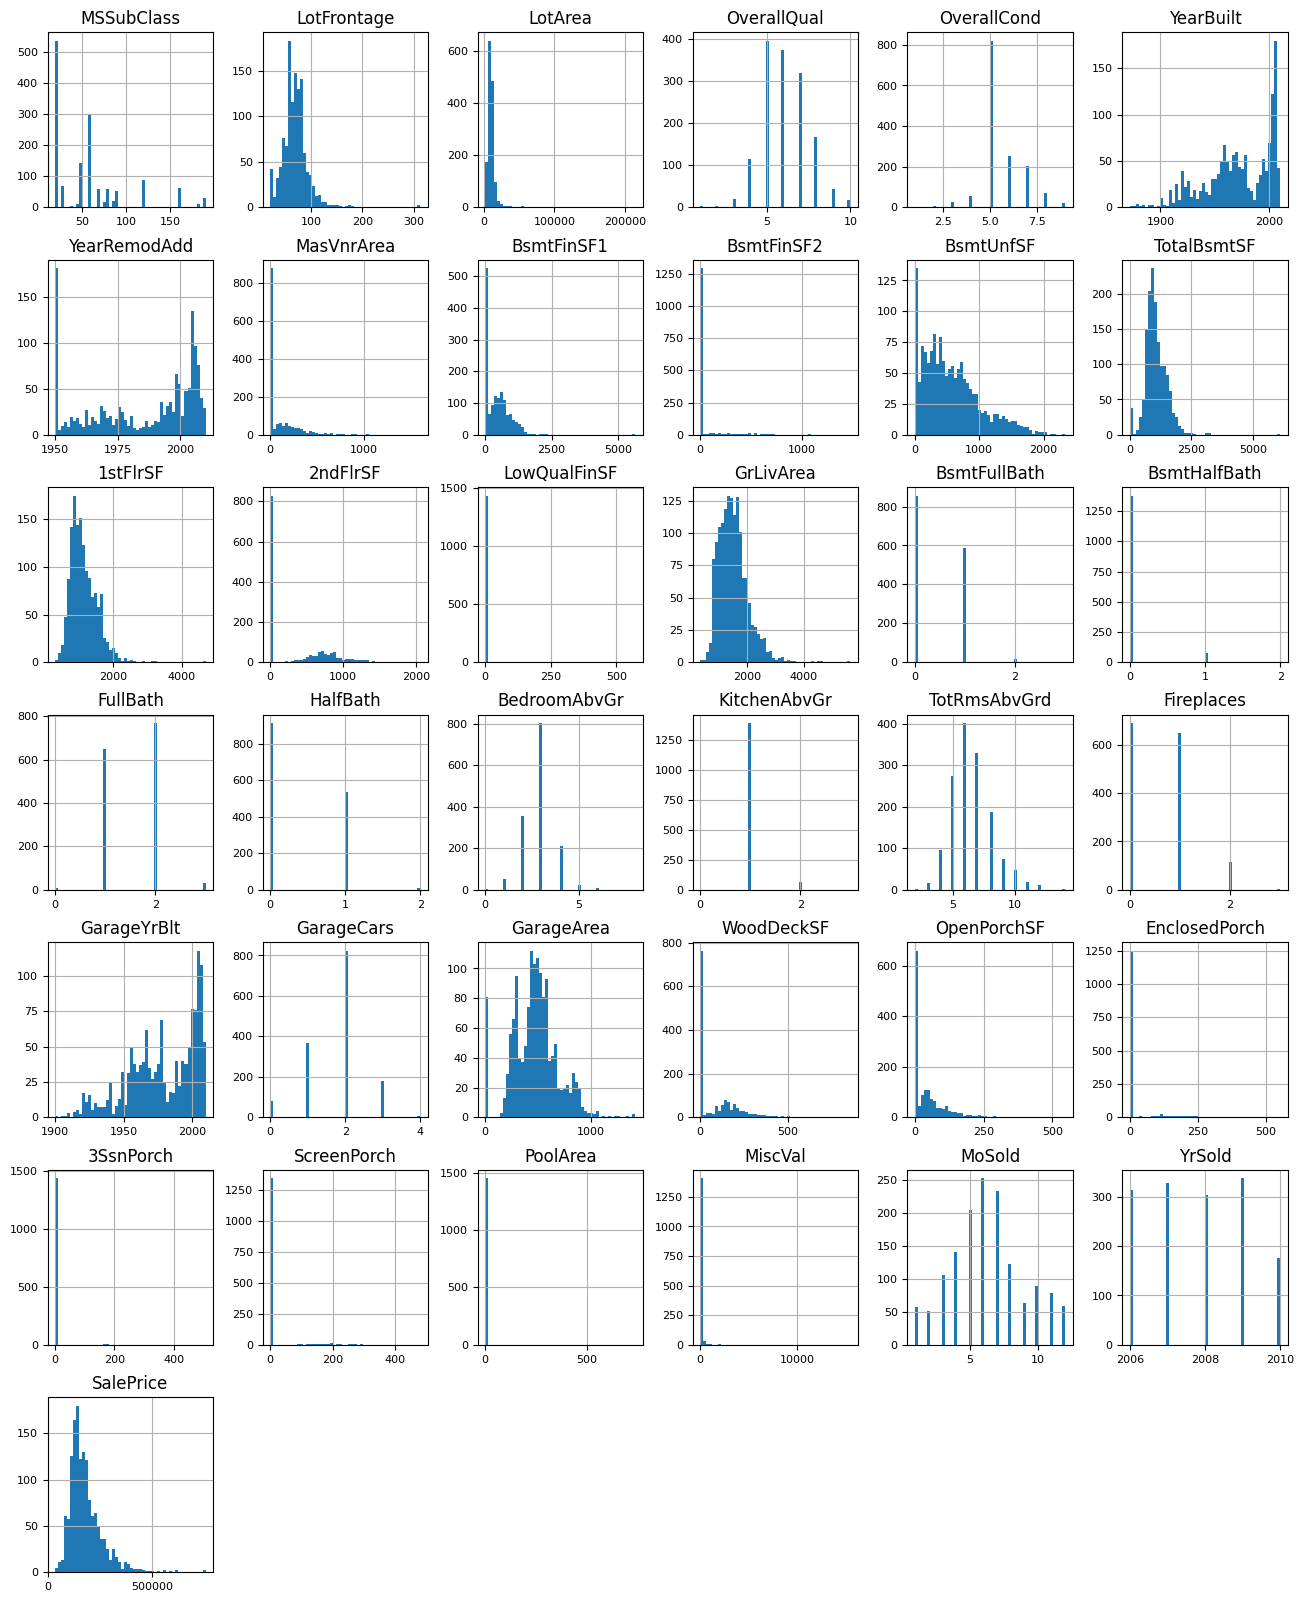

In [16]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

In [31]:
col_counts = dict(df_num.count(axis=0))
col_types = {c: d for c, d in dict(df_num.dtypes).items() if col_counts[c] > 1000 and c != 'SalePrice'}
_is_num = lambda x: x in (int, float)
# separate them
cols_numerical = sorted([col for col, dtp in col_types.items() if _is_num(dtp)])
cols_string = sorted([col for col, dtp in col_types.items() if not _is_num(dtp)])
print(f"NUMERICAL: {cols_numerical}")
print(f"CATEGORICAL: {cols_string}")

NUMERICAL: ['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF', 'EnclosedPorch', 'Fireplaces', 'FullBath', 'GarageArea', 'GarageCars', 'GarageYrBlt', 'GrLivArea', 'HalfBath', 'KitchenAbvGr', 'LotArea', 'LotFrontage', 'LowQualFinSF', 'MSSubClass', 'MasVnrArea', 'MiscVal', 'MoSold', 'OpenPorchSF', 'OverallCond', 'OverallQual', 'PoolArea', 'ScreenPorch', 'TotRmsAbvGrd', 'TotalBsmtSF', 'WoodDeckSF', 'YearBuilt', 'YearRemodAdd', 'YrSold']
CATEGORICAL: []


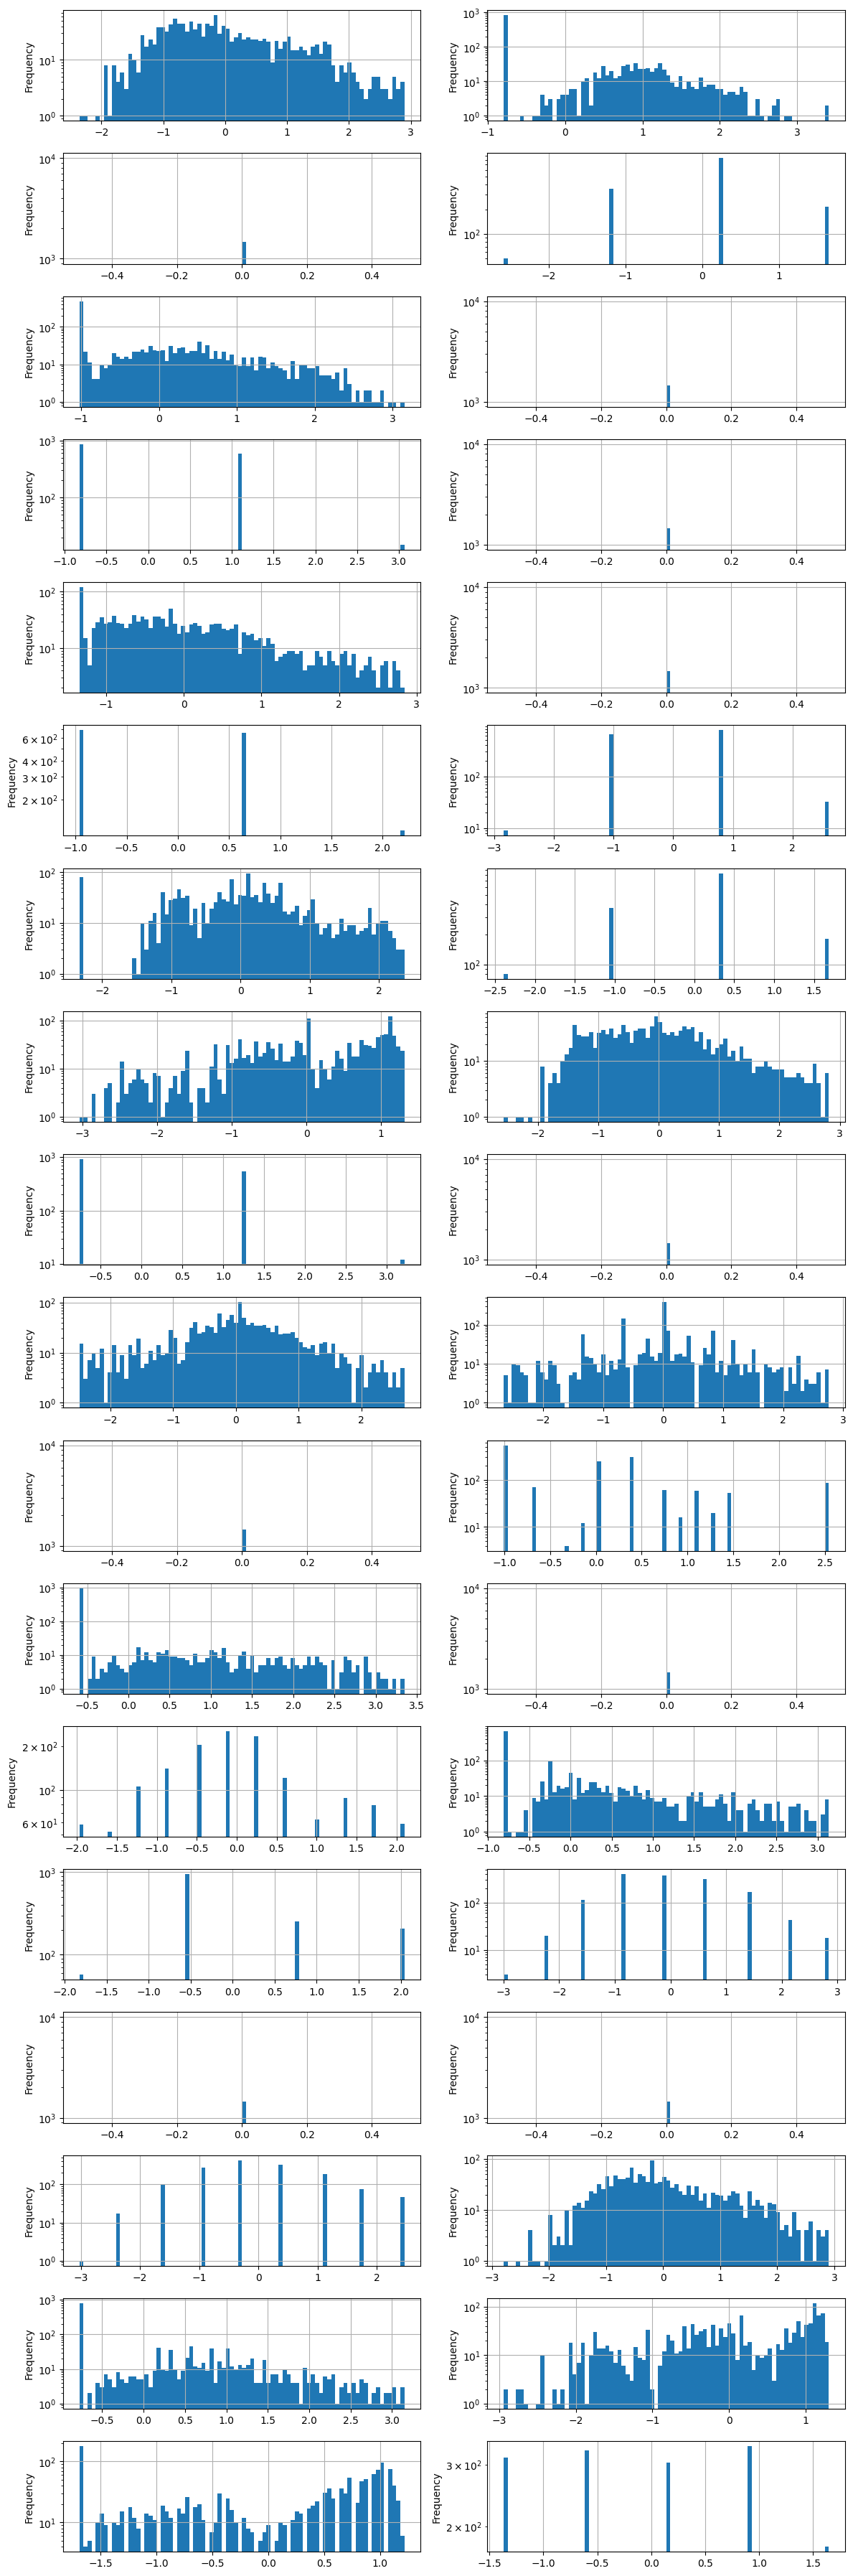

In [34]:
import math

nb_rows = math.ceil(len(cols_numerical) / 2)
fig, axarr = plt.subplots(ncols=2, nrows=nb_rows, figsize=(12, 2 * nb_rows))
for i, col in enumerate(cols_numerical):
    ax = axarr[i // 2, i % 2]
    df_num[col].plot.hist(ax=ax, bins=80, logy=True, xlabel=col, grid=True)
fig.tight_layout()

In [17]:
def getNullCol(df_num):
    categoricalCol = []
    numCol = []
    for col, val in df_num.isnull().sum().items():
        if val > 0 :
            if df_num[col].dtype == "object":
                categoricalCol.append(col)
            else :
                numCol.append(col)

    return categoricalCol, numCol

# Null Values

In [18]:
def RemoveNull(df_num):
    categoricalCol, numericalCol = getNullCol(df_num)
    for col in categoricalCol:
        df_num[col] = df_num[col].fillna(df_num[col].mode())
    for col in numericalCol:
        df_num[col] = df_num[col].fillna(df_num[col].median())
    print("Finished removing Null Values")
    return df_num
df_num = RemoveNull(df_num)

Finished removing Null Values


# Removing Outliers

In [19]:
import numpy as np
def removeOutliers(df_num):
    for col in df_num.select_dtypes(include=[np.number]).columns:
        q3 = df_num[col].quantile(0.75)
        q1 = df_num[col].quantile(0.25)
        iqr = q3 - q1
        upper_limit = q3 + 1.5 * iqr
        lower_limit = q1 - 1.5 * iqr
        median = df_num[col].median()
        df_num[col] = np.where((df_num[col] > upper_limit) | (df_num[col] < lower_limit), median, df_num[col])
    print("Finished Removing Outliers")
    return df_num
df_num = removeOutliers(df_num)

Finished Removing Outliers


# Scaling

In [20]:
from sklearn.preprocessing import StandardScaler

def scaler(df_num):
    scaler = StandardScaler()
    numeric_cols = df_num.select_dtypes(include=[np.number]).columns
    df_num[numeric_cols] = scaler.fit_transform(df_num[numeric_cols])
    print("Done Scaling Features")
    return df_num
df_num = scaler(df_num)

Done Scaling Features


In [21]:
from sklearn.preprocessing import LabelEncoder

def label_encode_columns(df_num):
    le = LabelEncoder()
    for col in df_num.select_dtypes('object').columns:
        df_num[col] = le.fit_transform(df_num[col])
    print("Done Label Encoding")
    return df_num
df_num = label_encode_columns(df_num)

Done Label Encoding


In [22]:
x = df_num.drop(columns=['SalePrice'])
y = df_num.SalePrice

In [23]:
x

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,0.412653,-0.274093,-0.266799,0.652641,-0.534267,1.060436,0.878668,1.290955,0.644729,0.0,...,0.421310,-0.775711,0.604457,0.0,0.0,0.0,0.0,0.0,-1.599111,0.138777
1,-1.008276,0.809612,0.101854,-0.077517,-0.534267,0.145062,-0.429577,-0.595110,1.287800,0.0,...,-0.020480,2.022812,-0.811305,0.0,0.0,0.0,0.0,0.0,-0.489110,-0.614439
2,0.412653,-0.057352,0.630791,0.652641,-0.534267,0.992630,0.830215,0.963781,0.124597,0.0,...,0.722530,-0.775711,0.163482,0.0,0.0,0.0,0.0,0.0,0.990891,0.138777
3,0.767886,-0.635329,0.085825,0.652641,-0.534267,-1.923005,-0.720298,-0.595110,-0.513745,0.0,...,0.893222,-0.775711,0.001017,0.0,0.0,0.0,0.0,0.0,-1.599111,-1.367655
4,0.412653,1.098601,1.595700,1.382798,-0.534267,0.958727,0.733308,2.772863,0.524153,0.0,...,1.867168,1.027364,1.138269,0.0,0.0,0.0,0.0,0.0,2.100892,0.138777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.412653,-0.490835,-0.437662,-0.077517,-0.534267,0.924825,0.733308,-0.595110,-1.024419,0.0,...,-0.020480,-0.775711,0.117064,0.0,0.0,0.0,0.0,0.0,0.620891,-0.614439
1456,-1.008276,1.170848,1.247884,-0.077517,0.755038,0.212867,0.151865,0.550001,0.843324,0.0,...,0.180333,2.501753,-0.811305,0.0,0.0,0.0,0.0,0.0,-1.599111,1.645210
1457,0.767886,-0.201846,-0.077023,0.652641,-0.534267,-1.041534,1.024029,-0.595110,-0.374256,0.0,...,-1.064711,-0.775711,0.581248,0.0,0.0,0.0,0.0,0.0,-0.489110,1.645210
1458,-1.008276,-0.057352,0.139360,-0.807674,0.755038,-0.736409,0.539493,-0.595110,-0.908572,0.0,...,-1.124955,2.661401,-0.811305,0.0,0.0,0.0,0.0,0.0,-0.859110,1.645210


In [24]:
y

0       0.665182
1       0.199480
2       0.923906
3      -0.516322
4       1.380984
          ...   
1455    0.087367
1456    0.691055
1457    1.665580
1458   -0.479669
1459   -0.386960
Name: SalePrice, Length: 1460, dtype: float64

# split

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=0)

# Model

In [26]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
lr_pred = lr.predict(x_test)

In [36]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, lr_pred))

0.29030308927989423
